# Task 3

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier

In [8]:
tweets_df = pd.read_csv("data/clean_processed_tweet.csv")

In [9]:
tweets_df.head()

,Unnamed: 0,created_at,source,Original_Text,full_text,sentiment,polarity,subjectivity,lang,favorite_count,retweet_count,possibly_sensitive,hashtags,user_mentions,place
0,0,2022-08-07 22:31:20+00:00,['source'],RT @i_ameztoy: Extra random image (I):\n\nLets...,rt iameztoy extra random image lets focus one ...,0,-1.250000e-01,0.190625,en,0,2,NaN,City,i_ameztoy,NaN
1,1,2022-08-07 22:31:16+00:00,['source'],RT @IndoPac_Info: #China's media explains the ...,rt indopacinfo chinas media explains military ...,0,-1.000000e-01,0.100000,en,0,201,NaN,"China, Taiwan",IndoPac_Info,NaN
2,2,2022-08-07 22:31:07+00:00,['source'],"China even cut off communication, they don't a...",china even cut communication dont anwer phonec...,-1,0.000000e+00,0.000000,en,0,0,NaN,XiJinping,ZelenskyyUa,Netherlands
3,3,2022-08-07 22:31:06+00:00,['source'],"Putin to #XiJinping : I told you my friend, Ta...",putin xijinping told friend taiwan vassal stat...,1,1.000000e-01,0.350000,en,0,0,NaN,XiJinping,NaN,Netherlands
4,4,2022-08-07 22:31:04+00:00,['source'],"RT @ChinaUncensored: I’m sorry, I thought Taiw...",rt chinauncensored i’m sorry thought taiwan in...,0,-6.938894e-18,0.556250,en,0,381,NaN,NaN,ChinaUncensored,"Ayent, Schweiz"


In [10]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          999 non-null    int64  
 1   created_at          999 non-null    object 
 2   source              999 non-null    object 
 3   Original_Text       999 non-null    object 
 4   full_text           999 non-null    object 
 5   sentiment           999 non-null    int64  
 6   polarity            999 non-null    float64
 7   subjectivity        999 non-null    float64
 8   lang                999 non-null    object 
 9   favorite_count      999 non-null    int64  
 10  retweet_count       999 non-null    int64  
 11  possibly_sensitive  246 non-null    object 
 12  hashtags            877 non-null    object 
 13  user_mentions       875 non-null    object 
 14  place               568 non-null    object 
dtypes: float64(2), int64(4), object(9)
memory usage: 117.2+ K

In [11]:
tweets_df.isna()

,Unnamed: 0,created_at,source,Original_Text,full_text,sentiment,polarity,subjectivity,lang,favorite_count,retweet_count,possibly_sensitive,hashtags,user_mentions,place
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False
4,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
995,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True
996,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
997,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False


In [12]:
tweets_df.isna()

,Unnamed: 0,created_at,source,Original_Text,full_text,sentiment,polarity,subjectivity,lang,favorite_count,retweet_count,possibly_sensitive,hashtags,user_mentions,place
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True
1,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False
4,False,False,False,False,False,False,False,False,False,False,False,True,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
995,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True
996,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
997,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False


In [13]:
tweets_df.shape

(999, 15)

In [14]:
tweets_df.columns

Index(['Unnamed: 0', 'created_at', 'source', 'Original_Text', 'full_text',
       'sentiment', 'polarity', 'subjectivity', 'lang', 'favorite_count',
       'retweet_count', 'possibly_sensitive', 'hashtags', 'user_mentions',
       'place'],
      dtype='object')

In [15]:
tweets_df.dropna()

,Unnamed: 0,created_at,source,Original_Text,full_text,sentiment,polarity,subjectivity,lang,favorite_count,retweet_count,possibly_sensitive,hashtags,user_mentions,place
5,5,2022-08-07 22:31:02+00:00,['source'],RT @benedictrogers: We must not let this happe...,rt benedictrogers must let happen must ready m...,1,0.200,0.500,en,0,36,False,Taiwan,benedictrogers,"Melbourne, Victoria"
36,36,2022-08-07 22:26:25+00:00,['source'],RT @ChinaInfo777: #PinkFloyd Roger Waters tell...,rt chinainfo777 pinkfloyd roger waters tells t...,-1,0.000,0.000,en,0,5,False,"PinkFloyd, Taiwan, China",ChinaInfo777,"Florida, USA"
39,39,2022-08-07 22:25:37+00:00,['source'],"RT @WilliamYang120: ""For too long, #Taiwan has...",rt williamyang120 long taiwan bullied marginal...,0,-0.025,0.200,en,0,84,False,Taiwan,WilliamYang120,Hong Kong
43,43,2022-08-07 22:25:05+00:00,['source'],RT @odisseoisback: #Corfu #Greece🇬🇷\n#Summer #...,rt odisseoisback corfu greece summer beaches t...,-1,0.000,0.000,en,0,2,False,"Corfu, Greece, Summer, Beaches, Travel, Excurs...",odisseoisback,Paris
48,48,2022-08-07 22:24:44+00:00,['source'],RT @benedictrogers: We must not let this happe...,rt benedictrogers must let happen must ready m...,1,0.200,0.500,en,0,36,False,Taiwan,benedictrogers,Hong Kong
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
960,960,2022-08-07 20:38:33+00:00,['source'],RT @Lavi4441: I think no caption need. #ChinaT...,rt lavi4441 think caption need chinataiwancris...,-1,0.000,0.000,en,0,1249,False,"ChinaTaiwanCrisis, Taiwan, China",Lavi4441,Hennessy in a TeaCup
963,963,2022-08-07 20:38:13+00:00,['source'],RT @Fallen_x_King: True that\n#China #Taiwan #...,rt fallenxking true china taiwan wwiii httpstc...,1,0.350,0.650,en,0,2303,False,"China, Taiwan, WWIII",Fallen_x_King,Hennessy in a TeaCup
965,965,2022-08-07 20:37:53+00:00,['source'],RT @AoxiPRNew: Taiwan now is an independent co...,rt aoxiprnew taiwan independent country pelosi...,-1,0.000,0.125,en,0,10,False,"pelosivisittotaiwan, ccplies, chinesecommunist...",AoxiPRNew,村里
967,967,2022-08-07 20:37:42+00:00,['source'],It seems that @SpeakerPelosi had a very succes...,seems speakerpelosi successful trip taiwan htt...,1,1.000,1.000,en,0,0,False,Taiwan,SpeakerPelosi,"South East, England"


In [16]:
tweets_df["source"] = tweets_df["source"].str.replace(r"(\s*\<.*?\>\s*)", " ", regex=True).str.strip()

In [17]:
tweets_df

,Unnamed: 0,created_at,source,Original_Text,full_text,sentiment,polarity,subjectivity,lang,favorite_count,retweet_count,possibly_sensitive,hashtags,user_mentions,place
0,0,2022-08-07 22:31:20+00:00,['source'],RT @i_ameztoy: Extra random image (I):\n\nLets...,rt iameztoy extra random image lets focus one ...,0,-1.250000e-01,0.190625,en,0,2,NaN,City,i_ameztoy,NaN
1,1,2022-08-07 22:31:16+00:00,['source'],RT @IndoPac_Info: #China's media explains the ...,rt indopacinfo chinas media explains military ...,0,-1.000000e-01,0.100000,en,0,201,NaN,"China, Taiwan",IndoPac_Info,NaN
2,2,2022-08-07 22:31:07+00:00,['source'],"China even cut off communication, they don't a...",china even cut communication dont anwer phonec...,-1,0.000000e+00,0.000000,en,0,0,NaN,XiJinping,ZelenskyyUa,Netherlands
3,3,2022-08-07 22:31:06+00:00,['source'],"Putin to #XiJinping : I told you my friend, Ta...",putin xijinping told friend taiwan vassal stat...,1,1.000000e-01,0.350000,en,0,0,NaN,XiJinping,NaN,Netherlands
4,4,2022-08-07 22:31:04+00:00,['source'],"RT @ChinaUncensored: I’m sorry, I thought Taiw...",rt chinauncensored i’m sorry thought taiwan in...,0,-6.938894e-18,0.556250,en,0,381,NaN,NaN,ChinaUncensored,"Ayent, Schweiz"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,994,2022-08-07 20:34:08+00:00,['source'],RT @RobertQ84643496: POLYMATECH INVESTS US$ 1 ...,rt robertq84643496 polymatech invests us 1 bil...,-1,0.000000e+00,0.000000,en,0,2,False,semiconductor,RobertQ84643496,Virginia
995,995,2022-08-07 20:34:05+00:00,['source'],"RT @SpokespersonCHN: ""#Taiwan is part of China...",rt spokespersonchn taiwan part china thats abs...,1,1.333333e-01,0.433333,en,0,669,NaN,Taiwan,SpokespersonCHN,NaN
996,996,2022-08-07 20:34:02+00:00,['source'],"RT @IndoPac_Info: From Chinese media:\n\n""#PLA...",rt indopacinfo chinese media pla eastern theat...,0,-5.000000e-02,0.050000,en,0,60,NaN,"PLA, Taiwan",IndoPac_Info,"奈良県 奈良市 Nara, JAPAN"
997,997,2022-08-07 20:33:52+00:00,['source'],RT @IndoPac_Info: 1) A Lithuanian delegation h...,rt indopacinfo 1 lithuanian delegation headed ...,-1,0.000000e+00,0.000000,en,0,66,NaN,Taiwan,IndoPac_Info,"奈良県 奈良市 Nara, JAPAN"


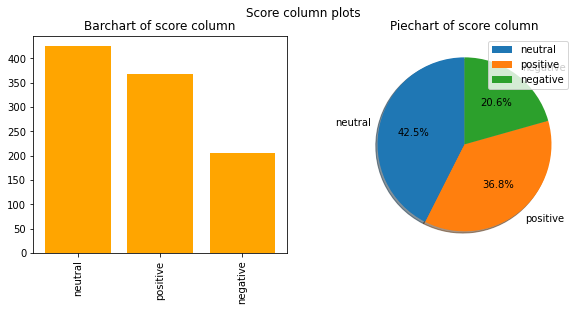

In [18]:
labels = ['neutral', 'positive', 'negative']

neutral_count =  len(tweets_df[tweets_df['polarity'] > 0])
positive_count = len(tweets_df[tweets_df['polarity'] == 0])
negative_count = len(tweets_df[tweets_df['polarity'] <0])
sizes = [neutral_count, positive_count, negative_count]
# Create a figure for 2 subplots (1 row, 2 columns)
fig, ax = plt.subplots(1, 2, figsize = (10,4))

# Create a bar plot of score column
ax[0].bar(x=labels, height=[neutral_count, positive_count, negative_count], color='orange')
ax[0].set_title('Barchart of score column')
ax[0].set_xticklabels(labels, rotation=90)

# Create a pie chart of score column based on neutral, positive or negative

ax[1].pie(sizes,labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax[1].set_title('Piechart of score column')
ax[1].legend(labels)

# Add a title to the Figure
fig.suptitle('Score column plots')

# Show the figure
fig.show()

## preprocessing 

In [19]:
tweets_df.insert(4,column = 'clean_text',value = tweets_df['Original_Text'])

In [20]:
tweets_df.head()

,Unnamed: 0,created_at,source,Original_Text,clean_text,full_text,sentiment,polarity,subjectivity,lang,favorite_count,retweet_count,possibly_sensitive,hashtags,user_mentions,place
0,0,2022-08-07 22:31:20+00:00,['source'],RT @i_ameztoy: Extra random image (I):\n\nLets...,RT @i_ameztoy: Extra random image (I):\n\nLets...,rt iameztoy extra random image lets focus one ...,0,-1.250000e-01,0.190625,en,0,2,NaN,City,i_ameztoy,NaN
1,1,2022-08-07 22:31:16+00:00,['source'],RT @IndoPac_Info: #China's media explains the ...,RT @IndoPac_Info: #China's media explains the ...,rt indopacinfo chinas media explains military ...,0,-1.000000e-01,0.100000,en,0,201,NaN,"China, Taiwan",IndoPac_Info,NaN
2,2,2022-08-07 22:31:07+00:00,['source'],"China even cut off communication, they don't a...","China even cut off communication, they don't a...",china even cut communication dont anwer phonec...,-1,0.000000e+00,0.000000,en,0,0,NaN,XiJinping,ZelenskyyUa,Netherlands
3,3,2022-08-07 22:31:06+00:00,['source'],"Putin to #XiJinping : I told you my friend, Ta...","Putin to #XiJinping : I told you my friend, Ta...",putin xijinping told friend taiwan vassal stat...,1,1.000000e-01,0.350000,en,0,0,NaN,XiJinping,NaN,Netherlands
4,4,2022-08-07 22:31:04+00:00,['source'],"RT @ChinaUncensored: I’m sorry, I thought Taiw...","RT @ChinaUncensored: I’m sorry, I thought Taiw...",rt chinauncensored i’m sorry thought taiwan in...,0,-6.938894e-18,0.556250,en,0,381,NaN,NaN,ChinaUncensored,"Ayent, Schweiz"


In [21]:
tweets_df

,Unnamed: 0,created_at,source,Original_Text,clean_text,full_text,sentiment,polarity,subjectivity,lang,favorite_count,retweet_count,possibly_sensitive,hashtags,user_mentions,place
0,0,2022-08-07 22:31:20+00:00,['source'],RT @i_ameztoy: Extra random image (I):\n\nLets...,RT @i_ameztoy: Extra random image (I):\n\nLets...,rt iameztoy extra random image lets focus one ...,0,-1.250000e-01,0.190625,en,0,2,NaN,City,i_ameztoy,NaN
1,1,2022-08-07 22:31:16+00:00,['source'],RT @IndoPac_Info: #China's media explains the ...,RT @IndoPac_Info: #China's media explains the ...,rt indopacinfo chinas media explains military ...,0,-1.000000e-01,0.100000,en,0,201,NaN,"China, Taiwan",IndoPac_Info,NaN
2,2,2022-08-07 22:31:07+00:00,['source'],"China even cut off communication, they don't a...","China even cut off communication, they don't a...",china even cut communication dont anwer phonec...,-1,0.000000e+00,0.000000,en,0,0,NaN,XiJinping,ZelenskyyUa,Netherlands
3,3,2022-08-07 22:31:06+00:00,['source'],"Putin to #XiJinping : I told you my friend, Ta...","Putin to #XiJinping : I told you my friend, Ta...",putin xijinping told friend taiwan vassal stat...,1,1.000000e-01,0.350000,en,0,0,NaN,XiJinping,NaN,Netherlands
4,4,2022-08-07 22:31:04+00:00,['source'],"RT @ChinaUncensored: I’m sorry, I thought Taiw...","RT @ChinaUncensored: I’m sorry, I thought Taiw...",rt chinauncensored i’m sorry thought taiwan in...,0,-6.938894e-18,0.556250,en,0,381,NaN,NaN,ChinaUncensored,"Ayent, Schweiz"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,994,2022-08-07 20:34:08+00:00,['source'],RT @RobertQ84643496: POLYMATECH INVESTS US$ 1 ...,RT @RobertQ84643496: POLYMATECH INVESTS US$ 1 ...,rt robertq84643496 polymatech invests us 1 bil...,-1,0.000000e+00,0.000000,en,0,2,False,semiconductor,RobertQ84643496,Virginia
995,995,2022-08-07 20:34:05+00:00,['source'],"RT @SpokespersonCHN: ""#Taiwan is part of China...","RT @SpokespersonCHN: ""#Taiwan is part of China...",rt spokespersonchn taiwan part china thats abs...,1,1.333333e-01,0.433333,en,0,669,NaN,Taiwan,SpokespersonCHN,NaN
996,996,2022-08-07 20:34:02+00:00,['source'],"RT @IndoPac_Info: From Chinese media:\n\n""#PLA...","RT @IndoPac_Info: From Chinese media:\n\n""#PLA...",rt indopacinfo chinese media pla eastern theat...,0,-5.000000e-02,0.050000,en,0,60,NaN,"PLA, Taiwan",IndoPac_Info,"奈良県 奈良市 Nara, JAPAN"
997,997,2022-08-07 20:33:52+00:00,['source'],RT @IndoPac_Info: 1) A Lithuanian delegation h...,RT @IndoPac_Info: 1) A Lithuanian delegation h...,rt indopacinfo 1 lithuanian delegation headed ...,-1,0.000000e+00,0.000000,en,0,66,NaN,Taiwan,IndoPac_Info,"奈良県 奈良市 Nara, JAPAN"


In [22]:
tweets_df = tweets_df[['Original_Text','clean_text','polarity']]

In [23]:
def text_category (polarity):
    if polarity > 0:
        return 'positive'
    if polarity < 0:
        return 'negative'
    else:
        return 'neutral'

In [24]:
score= pd.Series([text_category(row_value) for row_value in tweets_df['polarity']])
tweets_df = pd.concat([tweets_df, score.rename('sentiment')], axis=1)
tweets_df.head()

,Original_Text,clean_text,polarity,sentiment
0,RT @i_ameztoy: Extra random image (I):\n\nLets...,RT @i_ameztoy: Extra random image (I):\n\nLets...,-1.250000e-01,negative
1,RT @IndoPac_Info: #China's media explains the ...,RT @IndoPac_Info: #China's media explains the ...,-1.000000e-01,negative
2,"China even cut off communication, they don't a...","China even cut off communication, they don't a...",0.000000e+00,neutral
3,"Putin to #XiJinping : I told you my friend, Ta...","Putin to #XiJinping : I told you my friend, Ta...",1.000000e-01,positive
4,"RT @ChinaUncensored: I’m sorry, I thought Taiw...","RT @ChinaUncensored: I’m sorry, I thought Taiw...",-6.938894e-18,negative


In [25]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import gensim
from gensim.models import CoherenceModel
from gensim import corpora
from pprint import pprint
import string
import re
import emoji
import nltk
nltk.download('words')
words = set(nltk.corpus.words.words())

[nltk_data] Downloading package words to /Users/biruk/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [35]:
def cleaner(tweet):
    tweet = re.sub("@[A-Za-z0-9]+","",tweet) #Remove @ sign
    tweet = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", tweet) #Remove http links
    tweet = " ".join(tweet.split())
    tweet = ''.join(c for c in tweet if c not in emoji.UNICODE_EMOJI) #Remove Emojis
    tweet = tweet.replace("#", "").replace("_", " ") #Remove hashtag sign but keep the text
    tweet = " ".join(w for w in nltk.wordpunct_tokenize(tweet) \
         if w.lower() in words or not w.isalpha())
    return tweet

tweets_df['clean_text'] = tweets_df['Original_Text'].map(lambda x: cleaner(x))
tweets_df.head()

,Original_Text,clean_text,polarity,sentiment
0,RT @i_ameztoy: Extra random image (I):\n\nLets...,: Extra random image ( I ): focus in one very ...,-1.250000e-01,negative
1,RT @IndoPac_Info: #China's media explains the ...,: China ' s media the military for each area o...,-1.000000e-01,negative
2,"China even cut off communication, they don't a...","China even cut off communication , they don ' ...",0.000000e+00,neutral
3,"Putin to #XiJinping : I told you my friend, Ta...","to : I told you my friend , will be a vassal s...",1.000000e-01,positive
4,"RT @ChinaUncensored: I’m sorry, I thought Taiw...",": I ’ m sorry , I thought was an independent c...",-6.938894e-18,negative


In [36]:
class PrepareData:
  def __init__(self,df):
    self.df=df
    
  def preprocess_data(self):
    #tweets_df = self.df.loc[self.df['lang'] =="en"]

    
    #text Preprocessing
    tweets_df['clean_text']=tweets_df['clean_text'].astype(str)
    tweets_df['clean_text'] = tweets_df['clean_text'].apply(lambda x: x.lower())
    tweets_df['clean_text']= tweets_df['clean_text'].apply(lambda x: x.translate(str.maketrans(' ', ' ', string.punctuation)))
    
    #Converting tweets to list of words For feature engineering
    sentence_list = [tweet for tweet in tweets_df['clean_text']]
    word_list = [sent.split() for sent in sentence_list]
    # print(word_list)

    #Create dictionary which contains Id and word 
    word_to_id = corpora.Dictionary(word_list) #generate unique tokens
    #  we can see the word to unique integer mapping
    # print(word_to_id.token2id)
    # using bag of words(bow), we create a corpus that contains the word id and its frequency in each document.
    corpus_1= [word_to_id.doc2bow(tweet) for tweet in word_list]
    # TFIDF

    return tweets_df['clean_text'],word_list, word_to_id, corpus_1

In [37]:
PrepareData_obj=PrepareData(tweets_df)
tweets_df['clean_text'],word_list ,id2word,corpus=PrepareData_obj.preprocess_data()

In [38]:
tweets_df

,Original_Text,clean_text,polarity,sentiment
0,RT @i_ameztoy: Extra random image (I):\n\nLets...,extra random image i focus in one very spec...,-1.250000e-01,negative
1,RT @IndoPac_Info: #China's media explains the ...,china s media the military for each area of ...,-1.000000e-01,negative
2,"China even cut off communication, they don't a...",china even cut off communication they don t ...,0.000000e+00,neutral
3,"Putin to #XiJinping : I told you my friend, Ta...",to i told you my friend will be a vassal sta...,1.000000e-01,positive
4,"RT @ChinaUncensored: I’m sorry, I thought Taiw...",i ’ m sorry i thought was an independent cou...,-6.938894e-18,negative
...,...,...,...,...
994,RT @RobertQ84643496: POLYMATECH INVESTS US$ 1 ...,us 1 billion in semiconductor chips source ...,0.000000e+00,neutral
995,"RT @SpokespersonCHN: ""#Taiwan is part of China...",is part of china that s been absolutely ac...,1.333333e-01,positive
996,"RT @IndoPac_Info: From Chinese media:\n\n""#PLA...",from media eastern theater command joint mi...,-5.000000e-02,negative
997,RT @IndoPac_Info: 1) A Lithuanian delegation h...,1 a delegation headed by minister of transpo...,0.000000e+00,neutral


In [39]:
id_words = [[(id2word[id], count) for id, count in line] for line in corpus]

In [40]:
print(id_words)

[[('city', 1), ('coast', 1), ('district', 1), ('extra', 1), ('focus', 1), ('i', 1), ('image', 1), ('in', 1), ('of', 1), ('one', 1), ('random', 1), ('specific', 1), ('ta', 1), ('the', 1), ('very', 1), ('western', 1), ('zone', 1), ('…', 1)], [('in', 2), ('of', 1), ('the', 5), ('…', 1), ('area', 1), ('china', 1), ('each', 1), ('for', 1), ('media', 1), ('military', 1), ('pi', 1), ('read', 1), ('s', 1), ('strait', 1)], [('the', 2), ('china', 1), ('s', 1), ('ask', 1), ('but', 1), ('change', 1), ('clown', 1), ('communication', 1), ('cut', 1), ('don', 1), ('even', 1), ('from', 1), ('here', 1), ('mind', 1), ('off', 1), ('stage', 1), ('t', 1), ('they', 1), ('to', 2), ('us', 1)], [('i', 2), ('the', 1), ('china', 1), ('s', 1), ('but', 1), ('to', 2), ('a', 1), ('be', 1), ('friend', 1), ('it', 1), ('like', 1), ('model', 1), ('much', 1), ('my', 1), ('open', 1), ('state', 1), ('told', 1), ('took', 1), ('vassal', 1), ('will', 1), ('you', 2)], [('i', 2), ('…', 1), ('military', 1), ('it', 1), ('an', 1), 

## Topic Modelling

In [41]:
lda_model = gensim.models.ldamodel.LdaModel(corpus,
                                           id2word=id2word,
                                           num_topics=5, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [43]:
pprint(lda_model.print_topics())

[(0,
  '0.057*"the" + 0.052*"…" + 0.039*"and" + 0.026*"of" + 0.024*"to" + '
  '0.022*"china" + 0.016*"in" + 0.015*"now" + 0.015*"do" + 0.015*"from"'),
 (1,
  '0.041*"…" + 0.039*"the" + 0.034*"her" + 0.028*"to" + 0.028*"and" + '
  '0.027*"for" + 0.024*"s" + 0.023*"us" + 0.022*"nancy" + 0.021*"’"'),
 (2,
  '0.071*"of" + 0.047*"china" + 0.045*"…" + 0.044*"is" + 0.037*"if" + '
  '0.036*"and" + 0.036*"the" + 0.034*"that" + 0.033*"part" + 0.032*"you"'),
 (3,
  '0.039*"to" + 0.034*"a" + 0.031*"is" + 0.027*"the" + 0.026*"…" + 0.025*"i" + '
  '0.023*"on" + 0.022*"in" + 0.021*"it" + 0.018*"china"'),
 (4,
  '0.053*"the" + 0.046*"china" + 0.030*"in" + 0.028*"s" + 0.027*"on" + '
  '0.025*"a" + 0.024*"…" + 0.020*"is" + 0.018*"to" + 0.014*"of"')]


In [44]:
pprint(lda_model.show_topics(formatted=False))

[(0,
  [('the', 0.057138246),
   ('…', 0.052068982),
   ('and', 0.03852734),
   ('of', 0.026293088),
   ('to', 0.023704508),
   ('china', 0.022190101),
   ('in', 0.01591547),
   ('now', 0.015399468),
   ('do', 0.015286742),
   ('from', 0.0151316775)]),
 (1,
  [('…', 0.04135065),
   ('the', 0.039468724),
   ('her', 0.03355176),
   ('to', 0.028148616),
   ('and', 0.027848475),
   ('for', 0.027346617),
   ('s', 0.023505237),
   ('us', 0.023218585),
   ('nancy', 0.021610798),
   ('’', 0.021010626)]),
 (2,
  [('of', 0.071029395),
   ('china', 0.046687912),
   ('…', 0.045249127),
   ('is', 0.04399108),
   ('if', 0.036876757),
   ('and', 0.035698272),
   ('the', 0.035635505),
   ('that', 0.034210093),
   ('part', 0.033290565),
   ('you', 0.032143142)]),
 (3,
  [('to', 0.039402198),
   ('a', 0.03421746),
   ('is', 0.030835478),
   ('the', 0.02716019),
   ('…', 0.026199292),
   ('i', 0.025360713),
   ('on', 0.023409918),
   ('in', 0.022169018),
   ('it', 0.020701285),
   ('china', 0.017903501)]

## Model Analysis

In [46]:
import pyLDAvis.gensim_models as gensimvis
import pickle 
import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)
LDAvis_prepared

/Users/biruk/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/biruk/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/biruk/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/Users/biruk/opt/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.201771 -0.173880       1        1  25.220244
1     -0.214941 -0.119853       2        1  24.499575
3      0.118712  0.138591       3        1  17.580020
4     -0.034407  0.106351       4        1  17.288206
0     -0.071134  0.048791       5        1  15.411954, topic_info=     Term        Freq       Total Category  logprob  loglift
215   her  141.000000  141.000000  Default  30.0000  30.0000
101  part  144.000000  144.000000  Default  29.0000  29.0000
99     is  343.000000  343.000000  Default  28.0000  28.0000
98     if  186.000000  186.000000  Default  27.0000  27.0000
34    don  127.000000  127.000000  Default  26.0000  26.0000
..    ...         ...         ...      ...      ...      ...
7      in   42.076789  237.952726   Topic5  -4.1405   0.1375
104  that   39.548097  217.908492   Topic5  -4.2024   0.1635
48     it   30.082322  114.250914   Topic5  -4.4760   0.5356
192  next   24.039555   41.213446   Topic5  -4.7003   1.3310
113    by   26.705893  185.104917   Topic5  -4.5951  -0.0660

[275 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
410       2  0.989490      1
819       3  0.968080   2021
198       2  0.981180      3
136       5  0.982870     38
425       2  0.981246      4
...     ...       ...    ...
403       1  0.072069     🇹🇼
403       2  0.036035     🇹🇼
403       3  0.900868     🇹🇼
780       3  0.903493     👉👉
197       5  0.979442  🚨🇨🇳🇹🇼

[298 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 4, 5, 1])

In [48]:
import sys
print(sys.executable)
from wordcloud import WordCloud

/Users/biruk/opt/anaconda3/bin/python


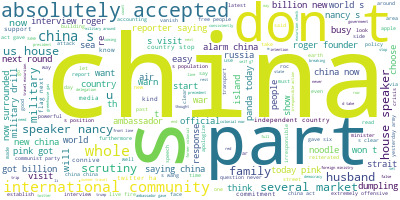

In [49]:
long_string = ','.join(list(tweets_df['clean_text'].values))

wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()